## By using scarpy, I scraped the exisitng listings of research positions on EURAXESS.com.
## This website is one of the most popular websites where research postions are listed from European countries
## By going through data analisys, I will analyze 
### 1. when is the most listing period, 
### 2. From what country, research positions are listed

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#Read CSV file. 
#'excels/phd_postions.csv' is the location of the file that I want to read
#I get error(UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 38: invalid continuation byte) without encoding = "ISO-8859-1"
phd=pd.read_csv('excels/phd_postions.csv',encoding = "ISO-8859-1")
phd.head()

,Title,Listed date,Application deadline,Country,Institution,Address
0,1,2,3,4,5,NaN
1,PhD vacancy in the area of audio and speech en...,09/01/2019,01/02/2019 00:00 - Europe/Brussels,Belgium,Ghent University,https://euraxess.ec.europa.eu/jobs/368978
2,PhD Researcher Position (3 years) at CiTIUS (I...,09/01/2019,28/02/2019 23:00 - Europe/Brussels,Spain,University of Santiago de Compostela (USC),https://euraxess.ec.europa.eu/jobs/368925
3,Research Assistant (# of pos: 2),09/01/2019,09/02/2019 22:00 - Europe/Athens,Poland,SWPS University of Social Sciences and Humanities,https://euraxess.ec.europa.eu/jobs/368923
4,Teagasc Post-Doctoral Research Fellow Level 1 ...,09/01/2019,24/01/2019 12:00 - Europe/Athens,Ireland,Teagasc,https://euraxess.ec.europa.eu/jobs/368922



### I intentionally inserted a dummy row in the first row, the dummy row needs to be removed

In [73]:
#Redefine 'phd' dataframe by specifying iloc[1:] , iloc[row,column] and row is 1: which is from index 1 to the end
phd=pd.read_csv('excels/phd_postions.csv',encoding = "ISO-8859-1").iloc[1:]


In [74]:
phd.info()# as you can see, 'Listed date','Application deadline' are objects, which are strings.
#and they need to change to dates for later analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 1 to 5635
Data columns (total 6 columns):
Title                   5635 non-null object
Listed date             5635 non-null object
Application deadline    5635 non-null object
Country                 5635 non-null object
Institution             5635 non-null object
Address                 5635 non-null object
dtypes: object(6)
memory usage: 264.2+ KB


In [75]:
#'to_datetime' function convert a string to a date. But an error occurs(Out of bounds nanosecond timestamp: 2999-01-01 00:00:00)
# which is that some of dates exceed the range of date(pd.Timestamp.max) that is defined in pandas.
# The range cannot be changed. But by putting errors='coerce', we can coerce the conversion.
phd['Listed date']= pd.to_datetime(phd['Listed date'].str[:10],format='%d/%m/%Y',errors = 'coerce')
phd['Application deadline']=pd.to_datetime(phd['Application deadline'].str[:10],format='%d/%m/%Y',errors = 'coerce')
# setting up the range of listed date 
listed_maxdate= phd['Listed date']>='2018-01-01'
listed_mindate= phd['Listed date']<='2018-12-31'
phd=phd[listed_maxdate & listed_mindate]
phd



,Title,Listed date,Application deadline,Country,Institution,Address
867,Senior Engineer,2018-12-31,2019-01-13,Poland,"Institute of Physical Chemistry, Polish Academ...",https://euraxess.ec.europa.eu/jobs/367331
878,public competition for university resercher fi...,2018-12-31,2019-01-14,Italy,Universita degli Studi Roma Tre,https://euraxess.ec.europa.eu/jobs/367412
879,public competition for university resercher fi...,2018-12-31,2019-01-14,Italy,Universita degli Studi Roma Tre,https://euraxess.ec.europa.eu/jobs/367413
880,public competition for university resercher fi...,2018-12-31,2019-01-14,Italy,Universita degli Studi Roma Tre,https://euraxess.ec.europa.eu/jobs/367414
881,Public selection for the recruitment of 1 fixe...,2018-12-31,2019-01-12,Italy,Universita degli Studi di Ferrara - Ufficio Se...,https://euraxess.ec.europa.eu/jobs/367402
882,Public selection for the recruitment of associ...,2018-12-31,2019-01-21,Italy,Universita degli Studi di Milano - Ufficio Rec...,https://euraxess.ec.europa.eu/jobs/367406
883,Public selection for the recruitment of associ...,2018-12-31,2019-01-21,Italy,Universita degli Studi di Milano - Ufficio Rec...,https://euraxess.ec.europa.eu/jobs/367407
884,Sea-Stress. Application of molecular tools for...,2018-12-31,2019-01-15,Italy,Stazione Zooligica Anton Dohrn,https://euraxess.ec.europa.eu/jobs/367415
885,Selection for the recruitment of 1 associate p...,2018-12-31,2019-01-14,Italy,Universita degli Studi Roma Tre,https://euraxess.ec.europa.eu/jobs/367410
886,Selection for the recruitment of 1 associate p...,2018-12-31,2019-01-14,Italy,Universita degli Studi Roma Tre,https://euraxess.ec.europa.eu/jobs/367411


In [76]:
year=phd['Listed date'].dt.year
month=phd['Listed date'].dt.month
day=phd['Listed date'].dt.day
year.unique() #you can seee only year2018 comes out in output

array([2018], dtype=int64)

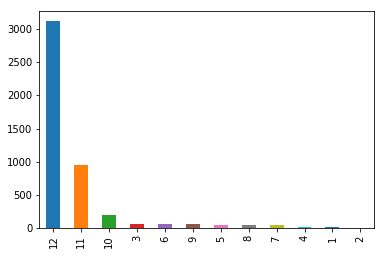

In [77]:
pd.value_counts(phd['Listed date'].dt.month).plot(kind='bar')

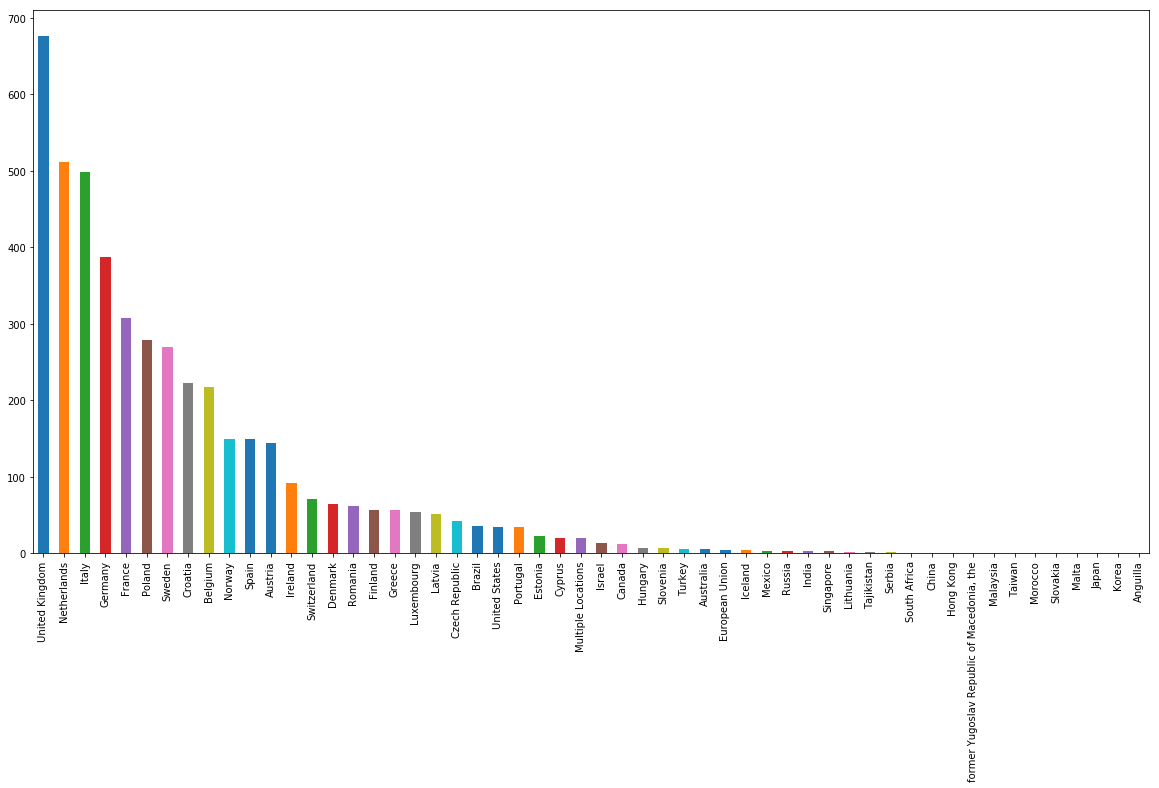

In [78]:
phd['Country'].value_counts().plot(kind='bar',figsize=(20,10))

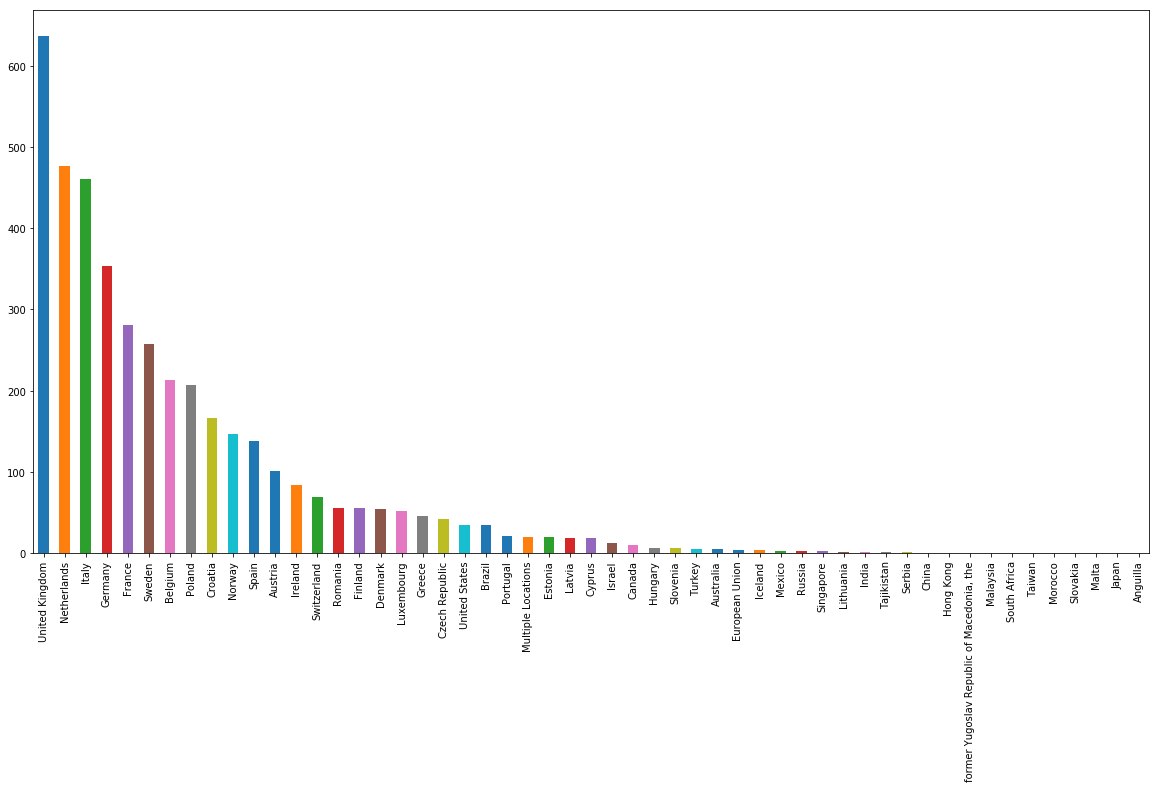

In [80]:
#I spotted some positions were listed multipletimes, lets remove them
phd.drop_duplicates(subset='Title', keep='first', inplace=True)
#lets re plot phd dataframe, and you can see positions decreased
phd['Country'].value_counts().plot(kind='bar',figsize=(20,10))

## Let's make a staked bar diagram(x axis=month, y axis = number of positions)

In [64]:
#lets make a new column of listed month
phd['Listed month']=phd['Listed date'].dt.month

In [65]:
#lest re structure phd dataframe to have only 'Listed month' and 'Country' columns
phd=phd[['Listed month','Country']]

In [70]:
# Countries will be staked in a bar, and I will specify interesting countries, in order to avoid having too many countries in a bar
phd=phd[phd['Country'].isin(['Austria','Germany','France','Italy','Norway','United Kingdom','Poland', 'Finland', 'Netherlands''Denmark', 'Belgium', 'Switzerland', 'Sweden', 'Spain','Luxembourg'])]

#lets check research postions by country
phd['Country'].value_counts()



United Kingdom    677
Italy             498
Germany           387
France            308
Poland            279
Sweden            270
Belgium           218
Spain             150
Norway            150
Austria           144
Switzerland        71
Finland            57
Luxembourg         54
Name: Country, dtype: int64

In [68]:
#By using pivot table , which is making 2dimensional table, by specifying index(x axis) and etc
phd.pivot_table(index='Listed month',columns='Country',aggfunc=len, fill_value=0)

Country,Austria,Belgium,Finland,France,Germany,Italy,Luxembourg,Norway,Poland,Spain,Sweden,Switzerland,United Kingdom
Listed month,,,,,,,,,,,,,
1,0,0,0,3,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,1,2,0,0
3,11,1,2,1,1,0,0,7,0,0,18,0,5
4,0,0,0,1,3,0,0,0,0,0,0,0,2
5,0,2,0,0,0,0,0,0,2,1,0,0,6
6,0,5,0,3,0,4,0,0,0,5,1,1,26
7,2,3,0,0,6,3,1,0,2,2,0,1,9
8,1,0,0,2,7,3,0,0,0,0,0,0,11
9,1,6,0,2,12,2,1,0,4,1,1,1,10


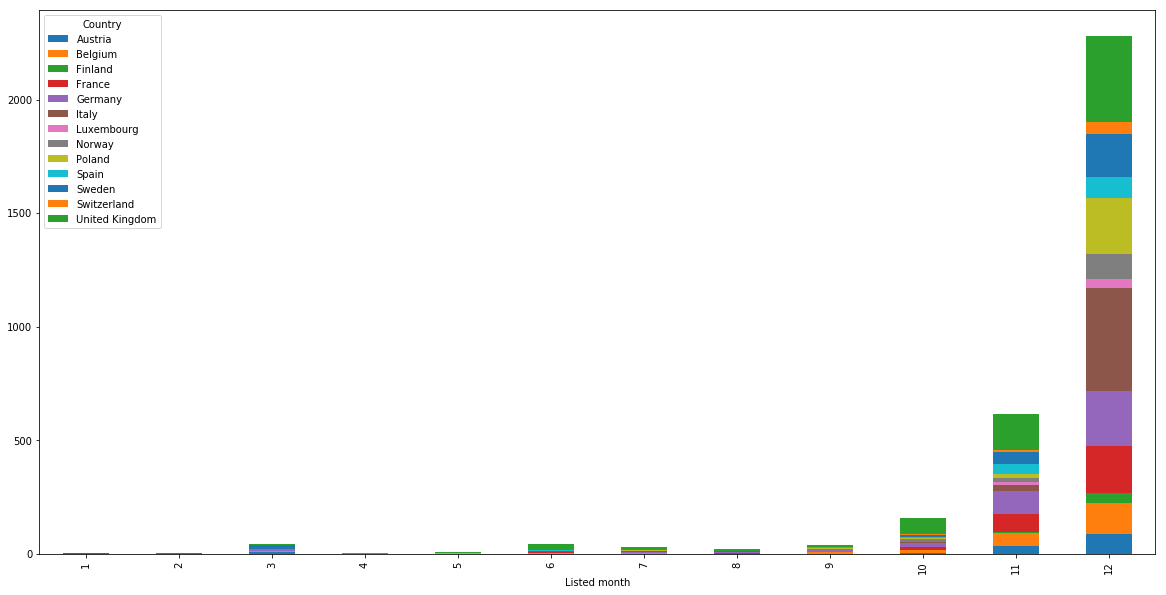

In [69]:
#Plotting stacked bar chart
phd.pivot_table(index='Listed month',columns='Country',aggfunc=len, fill_value=0).plot.bar(stacked=True,figsize=(20,10))